### Code for Bias Variance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], 
    "font.size": 11,                       
})

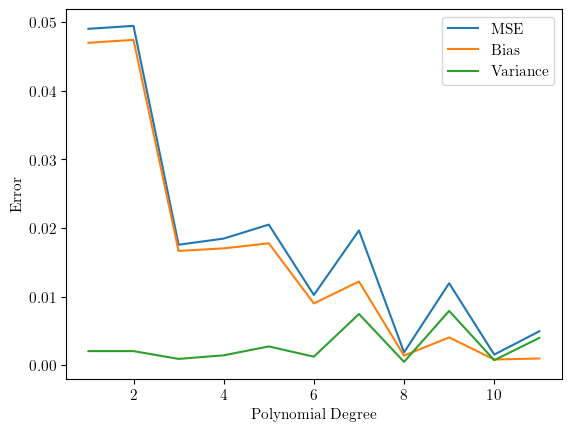

In [31]:
n = 100
bootstraps = 500
np.random.seed(42)
polynomial_degrees = range(1, 12)

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1,)

biases = []
variances = []
mses = []

for p in polynomial_degrees:
    X = PolynomialFeatures(degree=p).fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    predictions = np.zeros((bootstraps, len(y_test)))
    targets = np.zeros((bootstraps, len(y_test)))
    for b in range(bootstraps):
       X_train_re, y_train_re = resample(X_train, y_train,random_state=b)
       model = LinearRegression().fit(X_train_re, y_train_re)
       # make predictions on the test data
       predictions[b, :] = model.predict(X_test)
       targets[b, :] = y_test
    biases.append((np.mean(predictions, axis=0) - np.mean(targets, axis=0)) ** 2)
    variances.append(np.var(predictions, axis=0))
    mses.append(mean_squared_error(predictions, targets))

plt.plot(polynomial_degrees, mses, label="MSE")
plt.plot(polynomial_degrees, np.mean(biases, axis=1), label="Bias")
plt.plot(polynomial_degrees, np.mean(variances, axis=1), label="Variance")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.legend()
plt.savefig('bias_variance_tradeoff.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Code For Regularization and degrees

c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.36201e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.09509e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.03294e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix 

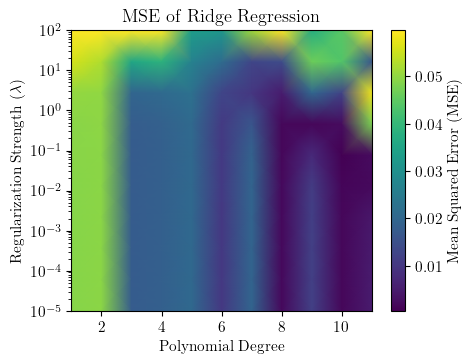

In [30]:
lambda_values = np.logspace(-5, 2, 10)
mse_grid = np.zeros((len(polynomial_degrees), len(lambda_values)))

for i, p in enumerate(polynomial_degrees):
    X = PolynomialFeatures(degree=p).fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_test = y_test.reshape(-1, 1)

    for j, lam in enumerate(lambda_values):
        # Bootstrap to find the MSE for this combination of p and lambda
        predictions = np.zeros((bootstraps, len(y_test)))
        for b in range(bootstraps):
            X_train_re, y_train_re = resample(X_train, y_train,random_state=b)
            model = Ridge(alpha=lam).fit(X_train_re, y_train_re)
            predictions[b, :] = model.predict(X_test)
        

        
        # Calculate MSE
        mse = np.mean(np.mean((y_test - predictions.T)**2, axis=1, keepdims=True))
        mse_grid[i, j] = mse
    

# --- Create the Heatmap Plot ---
# Set the figure size to match LaTeX.
plt.figure(figsize=(4.85, 3.64))
# Create a meshgrid for the hyperparameters
X_mesh, Y_mesh = np.meshgrid(polynomial_degrees, lambda_values)

# Use pcolormesh to create the heatmap
c = plt.pcolormesh(X_mesh.T, Y_mesh.T, mse_grid, cmap='viridis', shading='gouraud', vmin=np.min(mse_grid), vmax=np.percentile(mse_grid, 95))

plt.yscale('log')
cbar = plt.colorbar(c)
cbar.set_label('Mean Squared Error (MSE)')
plt.xlabel('Polynomial Degree')
plt.ylabel(r'Regularization Strength ($\lambda$)')
plt.title('MSE of Ridge Regression')
plt.savefig('ridge_heatmap.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

